<a href="https://colab.research.google.com/github/Majid5654/Erwan-Majid_PCVK_Ganjil_2025/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. The following are steps that can be taken :
b. Access the files contained on the drive and import some of the libraries that are
needed

b. Access the files contained on the drive and import some of the libraries that are
needed

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as im
import cv2 as cv
import math

3. Create Image Filter for Average filter, low pass filter, high pass filter, and some of the following
filters

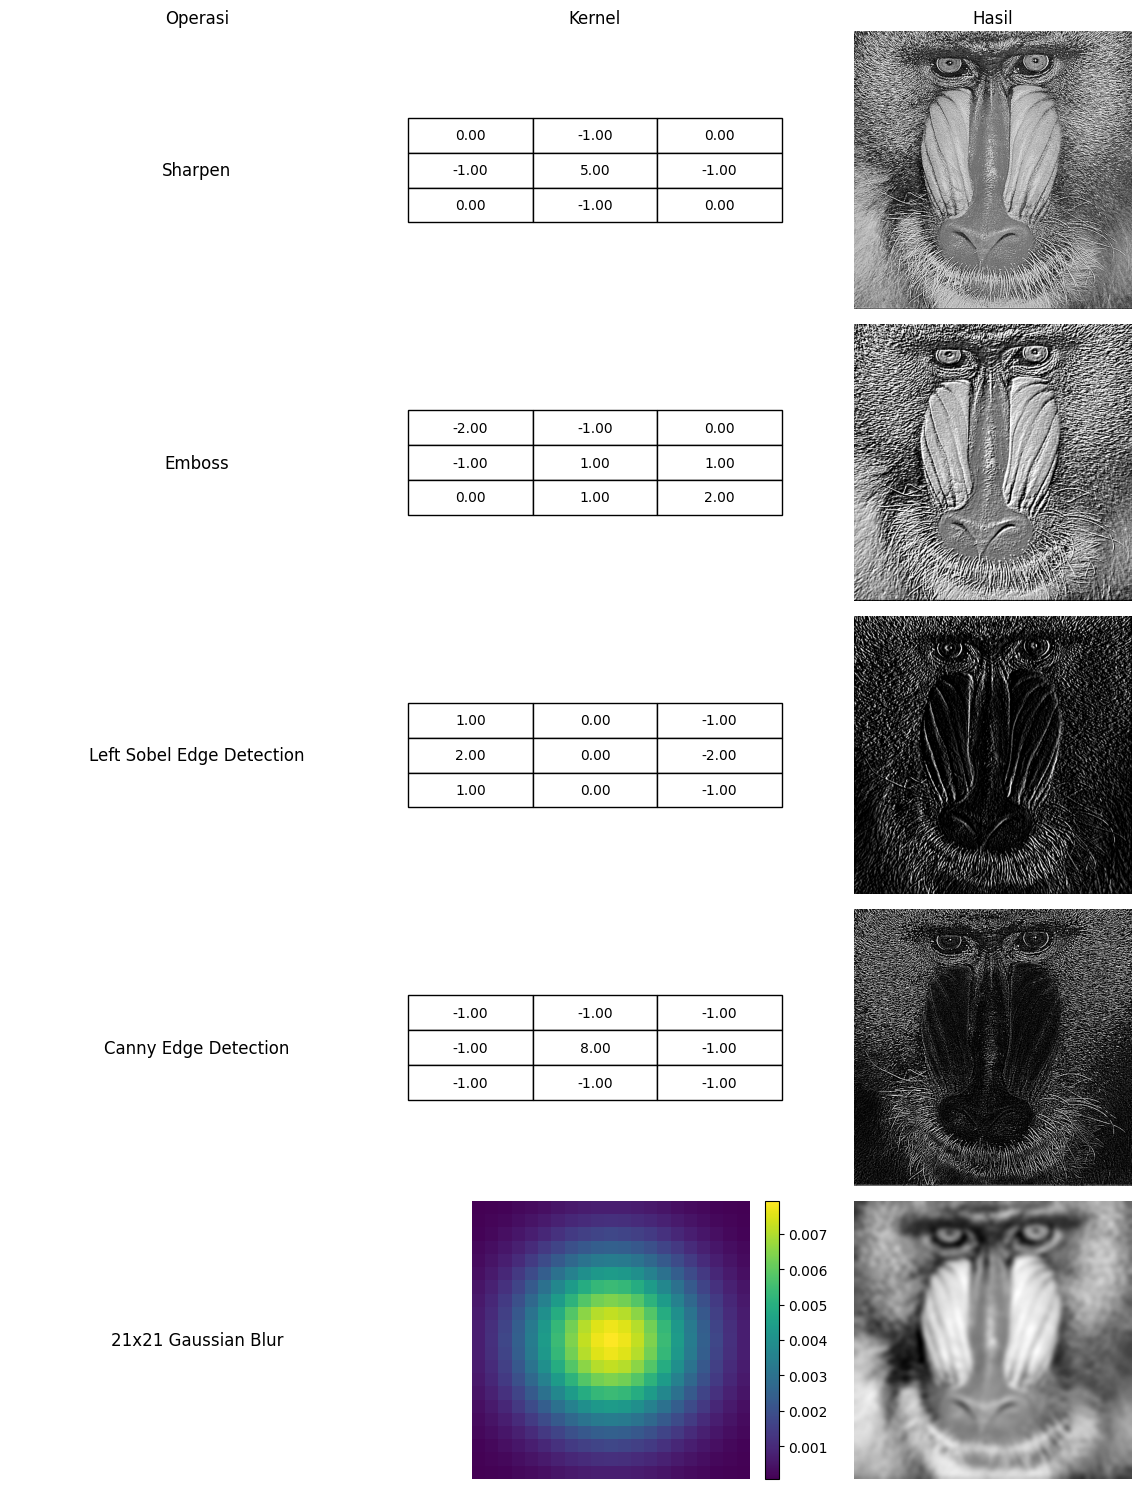

In [30]:
# -------------------------
# Helper: convolution wrapper
# -------------------------
def convolution2d(img, kernel):
    # ensure kernel is float32
    k = np.array(kernel, dtype=np.float32)
    return cv.filter2D(img, -1, k)

# -------------------------
# Helper: pretty kernel plot
# -------------------------
def plot_kernel(ax, kernel):
    k = np.array(kernel, dtype=np.float32)
    ax.axis("off")
    max_dim = max(k.shape)
    if k.size <= 25:  # small kernel -> show as table of values
        # format numbers
        cell_text = [[f"{val:.2f}" for val in row] for row in k]
        table = ax.table(cellText=cell_text, loc="center", cellLoc="center")
        table.scale(1, 1.5)
    else:  # large kernel -> show heatmap
        im = ax.imshow(k, cmap="viridis", interpolation="nearest")
        ax.set_xticks([])
        ax.set_yticks([])
        # add colorbar
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# -------------------------
# Load image (grayscale)
# -------------------------
img_path = '/content/drive/MyDrive/PCVK/mandrill.tiff'
img = cv.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Cannot find image at: {img_path}")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# -------------------------
# Define kernels
# -------------------------
kernelS = np.array([[0, -1,  0],
                    [-1, 5, -1],
                    [0, -1,  0]], dtype=np.float32)

kernelE = np.array([[-2, -1, 0],
                    [-1,  1, 1],
                    [0,   1, 2]], dtype=np.float32)

kernelLSED = np.array([[1, 0, -1],
                       [2, 0, -2],
                       [1, 0, -1]], dtype=np.float32)

kernelCED = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], dtype=np.float32)

kernel_size = 21
sigma = math.sqrt(kernel_size)
g_col = cv.getGaussianKernel(kernel_size, sigma).astype(np.float32)   # column vector
gauss_kernel = (g_col @ g_col.T).astype(np.float32)                  # 2D 21x21 kernel

# -------------------------
# Apply filters
# -------------------------
sharpened     = convolution2d(img_gray, kernelS)
embossed      = convolution2d(img_gray, kernelE)
sobel_left    = convolution2d(img_gray, kernelLSED)
canny_like    = convolution2d(img_gray, kernelCED)
gaussian_blur = convolution2d(img_gray, gauss_kernel)

# -------------------------
# Prepare table data
# -------------------------
titles = ["Sharpen", "Emboss", "Left Sobel Edge Detection",
          "Canny Edge Detection", "21x21 Gaussian Blur"]

kernels = [kernelS, kernelE, kernelLSED, kernelCED, gauss_kernel]
results = [sharpened, embossed, sobel_left, canny_like, gaussian_blur]

# -------------------------
# Plot Operasi | Kernel | Hasil
# -------------------------
n = len(results)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 3*n))

for i in range(n):
    # Column 0: Operation name
    ax0 = axes[i, 0]
    ax0.axis("off")
    ax0.text(0.5, 0.5, titles[i], fontsize=12, ha="center", va="center")
    if i == 0:
        ax0.set_title("Operasi")

    # Column 1: Kernel (table or heatmap)
    ax1 = axes[i, 1]
    plot_kernel(ax1, kernels[i])
    if i == 0:
        ax1.set_title("Kernel")

    # Column 2: Result image
    ax2 = axes[i, 2]
    ax2.imshow(results[i], cmap="gray")
    ax2.axis("off")
    if i == 0:
        ax2.set_title("Hasil")

plt.tight_layout()
plt.show()

E. FILTER LIBRARY AND MODERN FILTER

**Experiment 1:**

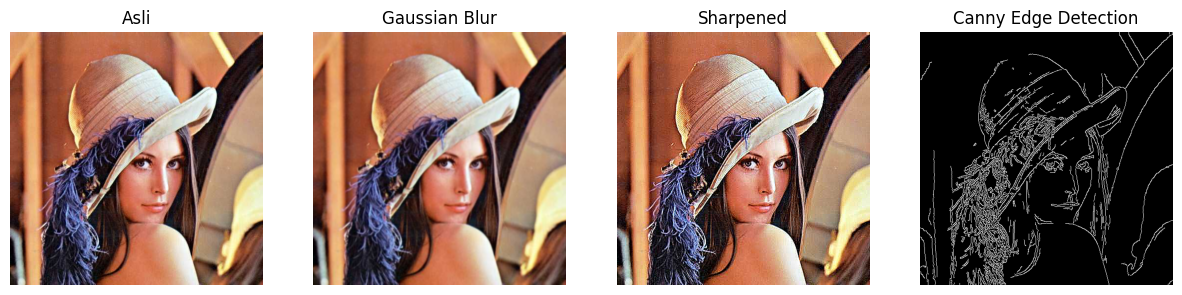

In [31]:
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK/lena.jpg")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img,(7,7),1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])


The code begins by defining a helper function show_side_by_side to display multiple images for comparison. An RGB image is loaded and converted to grayscale for edge detection. Three different filters are then applied: Gaussian Blur using cv.GaussianBlur to smooth the image and reduce noise, a sharpening filter with cv.filter2D and a custom kernel to enhance edges and details, and Canny Edge Detection with cv.Canny to extract prominent edges in the grayscale image. Finally, the original, blurred, sharpened, and edge-detected images are displayed side by side, showing how each filter affects the image differently—Gaussian Blur produces a smoother result, sharpening makes the image crisper, and Canny highlights only the edges

**Experiment 2:**


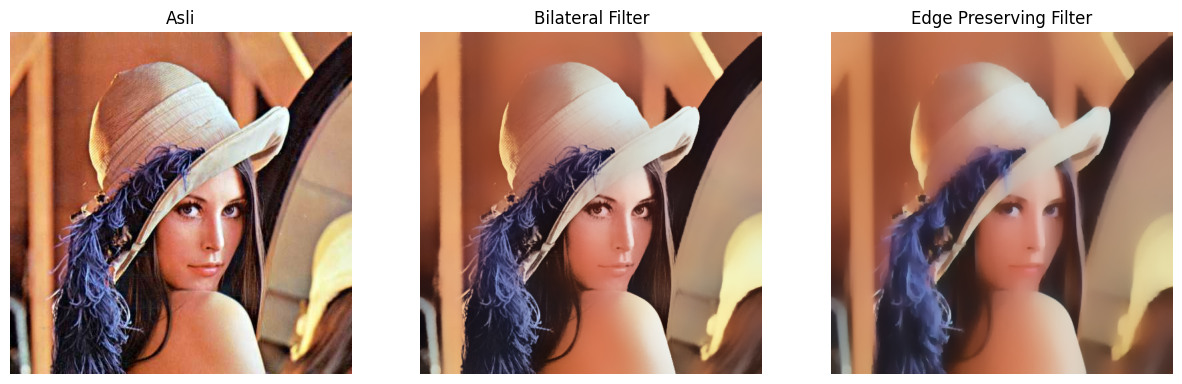

In [32]:
# Filter Modern dari OpenCV
# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])


The code applies two modern filters from OpenCV. First, cv.bilateralFilter(img, 50, 100, 100) applies a bilateral filter to the image, where the parameters are d=50 (the diameter of the pixel neighborhood), sigmaColor=100 (the sensitivity to color differences), and sigmaSpace=100 (the spatial distance between pixels). This filter smooths flat regions while keeping edges sharp. Second, cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9) applies an edge-preserving filter, which is a variant of the guided filter available in OpenCV. Here, sigma_s controls the spatial radius and sigma_r controls the sensitivity to intensity differences. This produces a smoother result compared to bilateral filtering while still preserving edges. Finally, the function show_side_by_side([img, bilateral, edge_preserve], [...]) is used to display the original image, the bilateral filter result, and the guided/edge-preserving filter result side by side for comparison.

Difference between Bilateral and Guided Filter:

1.Bilateral Filter
-Smooths flat regions (e.g., skin areas).
-Preserves edges because it considers both spatial distance and color differences.
-Drawback: relatively slower due to complex weight calculations.


2. Guided / Edge-Preserving Filter

-Produces smoother and more natural results.
-Faster computation compared to bilateral filtering.
-Can use another image as a “guide,” making it more flexible.

**Experiment 3:**


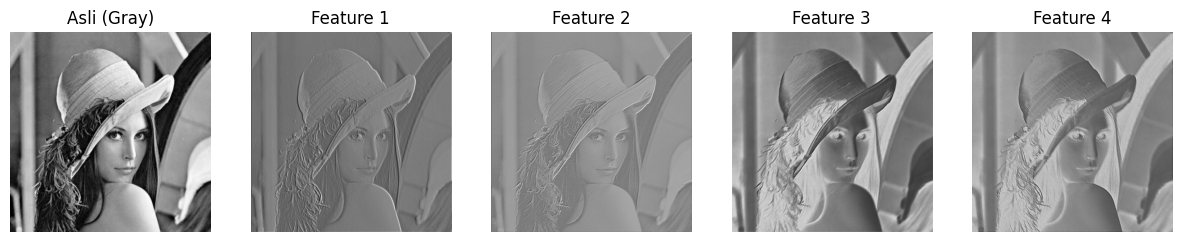

In [33]:
# Filter Feature Map yang digunakan pada CNN, lakukan running code bagian ini beberapa kali dan perhatikan hasilnya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps,
                  ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])


**Running the code multiple times gives different results**, since the convolution weights are initialized randomly.This shows how CNNs start with random filters and then learn useful filters during training (by adjusting kernel weights through backpropagation).The experiment demonstrates the role of convolution in CNNs: extracting features from the input image to form the basis for higher-level recognition tasks.

This code defines and applies a simple convolutional neural network (CNN) to visualize feature maps. A class SimpleCNN is created with a single convolutional layer that takes one input channel (grayscale image) and produces four output channels using 3×3 kernels with stride 1 and padding 1, ensuring the output size matches the input. The grayscale image is converted into a PyTorch tensor, normalized to values between 0 and 1, and reshaped into the format [batch, channel, height, width]. The image tensor is then passed through the CNN, generating four feature maps, each corresponding to one convolution filter. These feature maps are extracted and converted into NumPy arrays for visualization. Finally, the original grayscale image and the resulting feature maps are displayed side by side, illustrating how convolution filters transform the input image into different feature representations.

**Experiment 4:**

In [34]:
# =================
# 1. Beauty Filter
# =================

# Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: Brightness & contrast
alpha = 1.2  # contrast
beta = 15    # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)


# =================
# 2. Old/Vintage Filter
# =================

# Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])

sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)


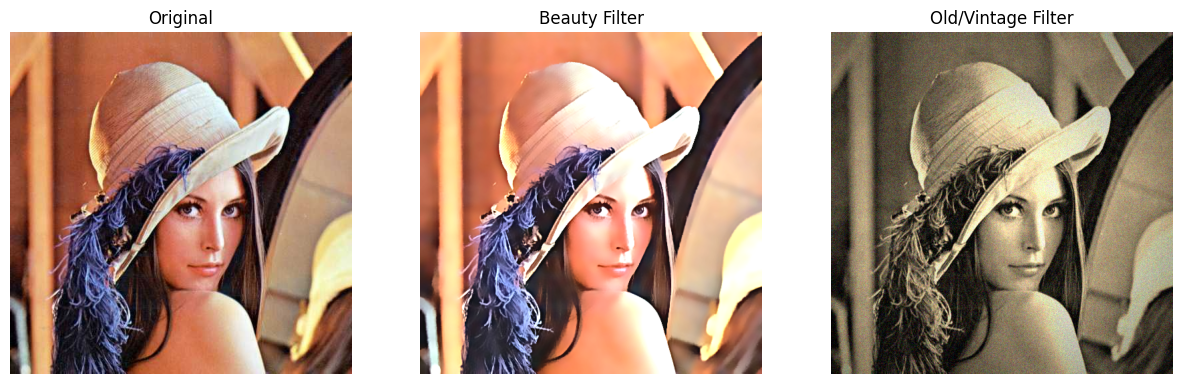

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(beauty, cv.COLOR_BGR2RGB))
plt.title("Beauty Filter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(old_img, cv.COLOR_BGR2RGB))
plt.title("Old/Vintage Filter")
plt.axis("off")

plt.show()


This code applies two different image filters: a beauty filter and an old/vintage filter. In the beauty filter, the image is first smoothed using a bilateral filter to reduce skin imperfections while preserving edges. Next, unsharp masking is applied by blending the smoothed image with a blurred version to enhance important details such as eyes or lips. Finally, brightness and contrast adjustments are made using scaling factors to make the image appear clearer and more vibrant. For the old/vintage filter, the process begins by applying a sepia tone transformation using a color conversion matrix, giving the image a warm, classic look. A vignette effect is then created by generating Gaussian masks for both rows and columns, darkening the edges of the image while keeping the center brighter. Lastly, random noise is added to simulate film grain, producing a nostalgic, aged appearance. Together, these steps demonstrate how multiple image processing techniques can be combined to achieve modern beautification effects or retro vintage styles

**Experiment 5:**

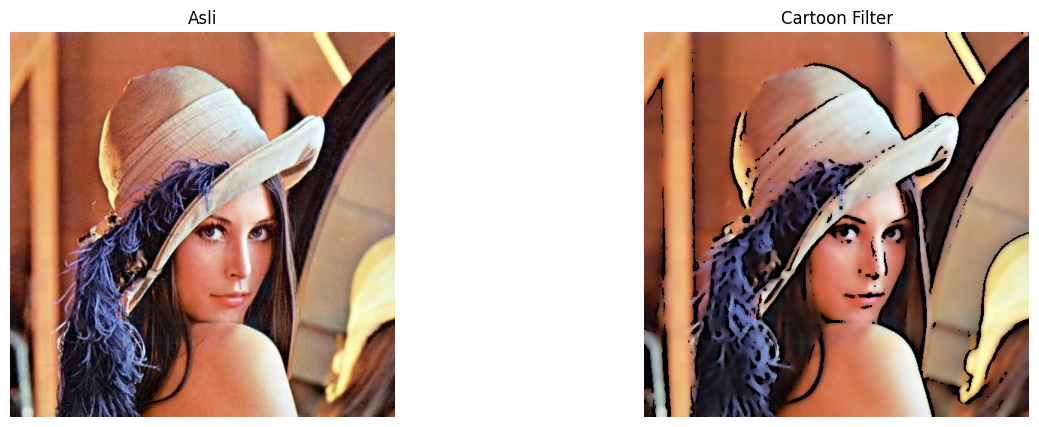

In [36]:
# Filter Anime / Cartoon

# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])


This code creates a cartoon or anime-style filter by combining edge detection with color smoothing. First, the image is converted to grayscale and smoothed using a median blur to reduce noise and make the edges cleaner. Then, adaptive thresholding is applied to detect strong edges, producing a binary edge mask. Next, the original image is smoothed with a bilateral filter, which reduces color variation while preserving important edges, resulting in a painting-like effect. Finally, the smoothed color image is combined with the detected edges using a bitwise operation, so that the outlines are emphasized while the colors remain soft and uniform. The result is a cartoonized version of the image that has bold edges and smooth, flat colors.

Experiment 6:

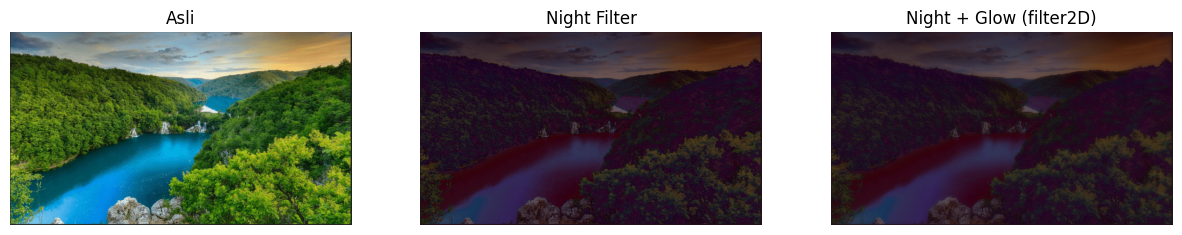

In [46]:
# Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK/jungle.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100))  # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])


This code applies a “night filter” effect to an image by darkening it, adding a blue tint, and enhancing bright areas with a glow. First, the image is read and converted to grayscale for potential use, while the main filter is applied to the color version. The brightness and contrast are reduced using cv.convertScaleAbs with a lower alpha and a negative beta, making the image look darker like nighttime. Then, a blue tint is created with np.full_like and blended with the darkened image using cv.addWeighted, giving the picture a cooler nighttime color tone. Next, a glow effect is generated by applying a blur kernel with cv.filter2D, which softens and brightens lighter regions. Finally, the glow is combined back with the tinted night image, again using cv.addWeighted, to produce the final “night with glow” effect. The original, night filter, and night+glow images are then displayed side by side for comparison.

Expreiment 7

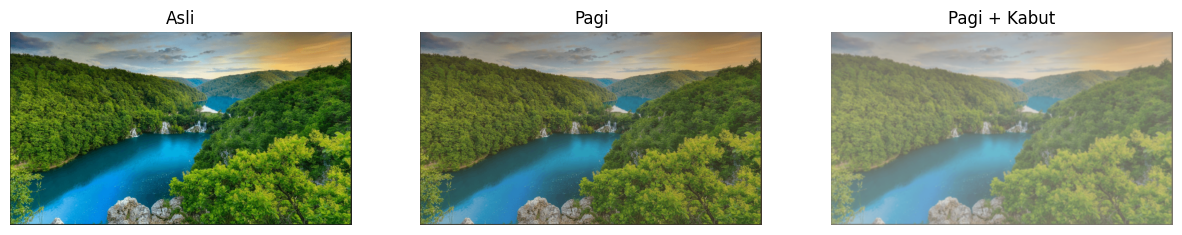

In [47]:
# Filter Suasana pagi dan Kabut
# =============================
# Step 1: Kurangi kontras & cerahkan
# =============================
alpha = 0.9   # contrast
beta = 20     # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# =============================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# =============================
warm_tint = np.full_like(soft, (40, 70, 120))  # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# =============================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# =============================
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T  # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])


This code creates a morning atmosphere filter with a fog effect by adjusting contrast, adding a warm tone, and simulating haze. First, the image contrast is slightly reduced and brightness increased using cv.convertScaleAbs, making the scene appear softer and lighter. Then, a warm tint layer with reddish–orange values is blended with the brightened image using cv.addWeighted, giving the picture a sunrise-like color tone. To add the fog effect, a Gaussian-like blur kernel is generated with cv.getGaussianKernel, converted into a 2D kernel, and applied using cv.filter2D to soften details and mimic haze. Finally, a semi-transparent white layer is added to the blurred image, enhancing the illusion of fog across the scene. The original image, the warm-toned morning version, and the final morning-with-fog result are displayed side by side for comparison